In [27]:
# # 코랩 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [1]:
# # 코랩 폰트 적용
# import matplotlib.pyplot as plt

# plt.rc('font', family='NanumBarunGothic') 

# plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# # 글씨 선명하게 출력하는 설정
# %config InlineBackend.figure_format = 'retina'

In [20]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline
import platform

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('data/@preprocessing_data_member01.csv')
data.head(7)

,Unnamed: 0,ID,총구매수량_x,기타품목구매비율,수저류구매비율,실링구매비율,용기류구매비율,위생용품구매비율,총구매횟수,총판매액,...,최종주문연도,최종주문월,최종주문일자,최종주문요일,최종주문시간,회원가입일(clean),가입연도,가입월,가입일자,가입요일
0,0,100304734@n,1.0,0.0,0.0,0.0,1.00,0.00,1,103300,...,2019.0,5.0,9.0,Thursday,14.0,2019-05-09 00:00:00,2019.0,5.0,9.0,Thursday
1,1,1003409866@k,62.0,0.0,0.0,0.0,1.00,0.00,18,4303880,...,2019.0,5.0,28.0,Tuesday,16.0,2019-01-07 00:00:00,2019.0,1.0,7.0,Monday
2,2,100381931@n,5.0,0.0,0.0,0.0,0.00,1.00,3,71050,...,2019.0,2.0,10.0,Sunday,21.0,2018-10-31 00:00:00,2018.0,10.0,31.0,Wednesday
3,3,1004498382@k,1.0,0.0,0.0,0.0,1.00,0.00,1,76400,...,2019.0,1.0,9.0,Wednesday,12.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday
4,4,1004547839@k,4.0,1.0,0.0,0.0,0.00,0.00,1,360800,...,2019.0,1.0,9.0,Wednesday,13.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday
5,5,1004714862@k,2.0,0.0,0.0,0.0,1.00,0.00,2,108110,...,2019.0,4.0,12.0,Friday,16.0,2019-01-09 00:00:00,2019.0,1.0,9.0,Wednesday
6,6,10055065@n,4.0,0.0,0.0,0.0,0.75,0.25,1,200480,...,2018.0,10.0,22.0,Monday,16.0,2018-10-22 00:00:00,2018.0,10.0,22.0,Monday


In [22]:
# apply 1
def extract_adress(data):
  result = data.split(' ')[0]
  return result

In [23]:
data['주소'].apply(extract_adress)

0         미확인
1       서울특별시
2       대구광역시
3         경기도
4        전라남도
        ...  
4919     충청남도
4920      경기도
4921      경기도
4922    부산광역시
4923    울산광역시
Name: 주소, Length: 4924, dtype: object

In [4]:
# apply 2
data['주소(시,도)'] = data['주소'].apply(lambda x: x.split(' ')[0])

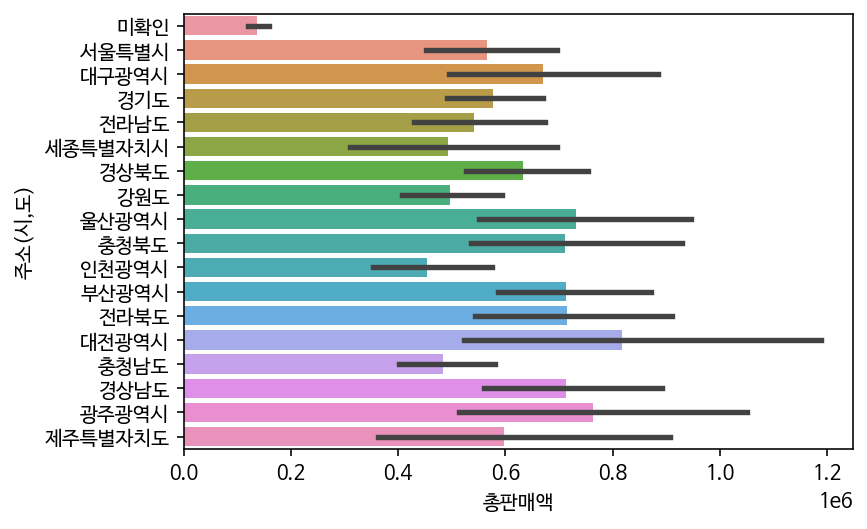

In [7]:
sns.barplot(data = data, y = '주소(시,도)', x = '총판매액')

25%는 96850.0이고 75%는 538045.0이다.


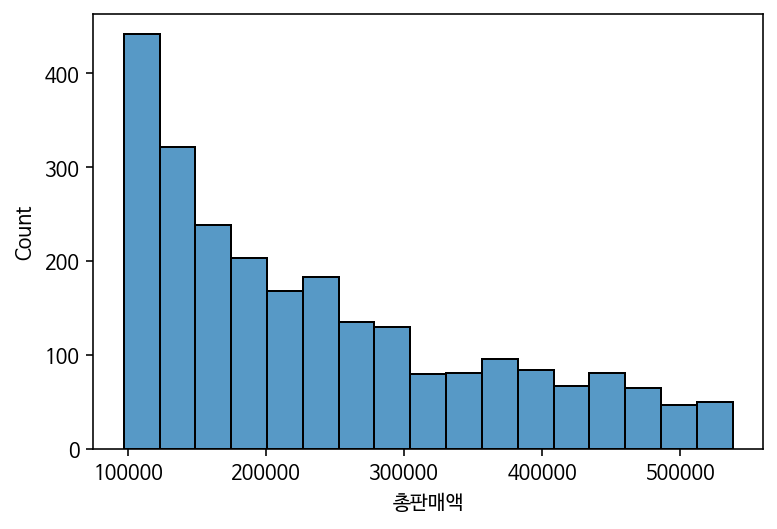

In [14]:
#9 
q1 = data['총판매액'].describe()['25%']
q3 = data['총판매액'].describe()['75%']

print(f'25%는 {q1}이고 75%는 {q3}이다.')
ex9 = data[(q1 <= data['총판매액']) & (data['총판매액'] <= q3)]
sns.histplot(data = ex9, x = '총판매액')

In [19]:
# 10 
data['ID'].value_counts().sort_values()

100304734@n           1
1004547839@k          1
1004714862@k          1
10055065@n            1
1005540326292754@f    1
                     ..
zamppo2               1
zagm10                1
z016291               1
zuingong73            1
zzzxkxk91             1
Name: ID, Length: 4924, dtype: int64

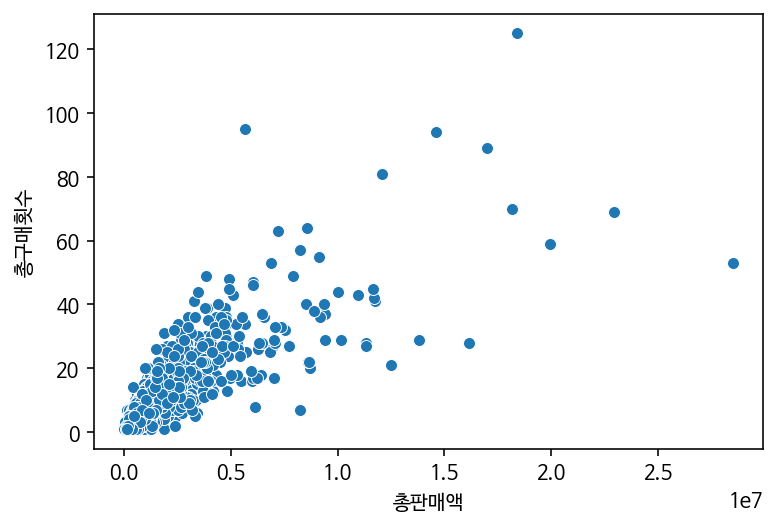

In [21]:
ex10 = data[['ID','총판매액','총구매횟수']]
sns.scatterplot(data = ex10, x = '총판매액', y = '총구매횟수')

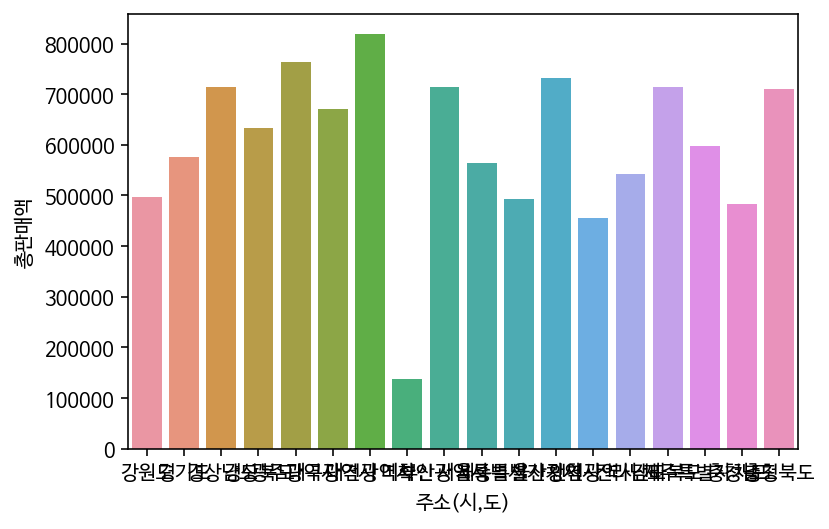

In [30]:
data2 = data.pivot_table(index='주소(시,도)',values='총판매액')
sns.barplot( data = data2, x=data2.index,y='총판매액')


# 데이터 결합

### Concat

In [31]:
import pandas as pd

df1 = pd.read_csv('data/concat_1.csv')
df2 = pd.read_csv('data/concat_2.csv')
df3 = pd.read_csv('data/concat_3.csv')

In [32]:
df1.head()

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [33]:
df2.head()

,A,B,C,D
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [34]:
df3.head()

,A,B,C,D
0,a8,b8,c8,d8
1,a9,b9,c9,d9
2,a10,b10,c10,d10
3,a11,b11,c11,d11


In [35]:
row_concat = pd.concat([df1,df2,df3])
row_concat

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [36]:
row_concat.iloc[3,:]

A    a3
B    b3
C    c3
D    d3
Name: 3, dtype: object

In [37]:
row_concat.loc[3,:]

,A,B,C,D
3,a3,b3,c3,d3
3,a7,b7,c7,d7
3,a11,b11,c11,d11


In [39]:
new_row_series = pd.Series(['n1','n2','n3','n4'])
new_row_series

0    n1
1    n2
2    n3
3    n4
dtype: object

In [41]:
pd.concat([df1, new_row_series])

,A,B,C,D,0
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
0,NaN,NaN,NaN,NaN,n1
1,NaN,NaN,NaN,NaN,n2
2,NaN,NaN,NaN,NaN,n3
3,NaN,NaN,NaN,NaN,n4


In [42]:
new_row_df = pd.DataFrame([['n1','n2','n3','n4']], columns = ['A','B','C','D'])
new_row_df

,A,B,C,D
0,n1,n2,n3,n4


In [43]:
pd.concat([df1, new_row_df])

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,n1,n2,n3,n4


In [44]:
pd.concat([df1, new_row_df], ignore_index = True)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,n1,n2,n3,n4


In [46]:
row_concat_i = pd.concat([df1,df2,df3], ignore_index = True)
row_concat_i

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [47]:
row_concat_i.iloc[4,:]

A    a4
B    b4
C    c4
D    d4
Name: 4, dtype: object

In [48]:
row_concat_i.loc[4,:]

A    a4
B    b4
C    c4
D    d4
Name: 4, dtype: object

In [49]:
col_concat = pd.concat([df1,df2,df3], axis = 1)
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [51]:
col_concat['A']

,A,A,A
0,a0,a4,a8
1,a1,a5,a9
2,a2,a6,a10
3,a3,a7,a11


In [54]:
# 열방향으로 데이터를 추가하는 방법 
col_concat['new_col_list'] = ['n1','n2', 'n3', 'n4']
col_concat

In [53]:
pd.concat([df1,df2,df3], axis = 1, ignore_index = True)

,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [57]:
df1.columns = ['A', 'B', 'C', 'D']
df2.columns = ['E', 'F', 'G', 'H']
df3.columns = ['A', 'C', 'F', 'H']

In [63]:
row_concat = pd.concat([df1,df2,df3])

In [70]:
pd.concat([df1,df3], join  = 'inner', ignore_index = True)

,A,C
0,a0,c0
1,a1,c1
2,a2,c2
3,a3,c3
4,a8,b8
5,a9,b9
6,a10,b10
7,a11,b11


### Merge

In [76]:
person = pd.read_csv('data/survey_person.csv')
site = pd.read_csv('data/survey_site.csv')
survey = pd.read_csv('data/survey_survey.csv')
visited = pd.read_csv('data/survey_visited.csv')

In [72]:
person.head()

,ident,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


In [73]:
site.head()

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [77]:
survey.head()

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41


In [85]:
# pd.merge(site, visited_subset)
visited_subset = visited.loc[[0,2,6],:]
o2o_merge = site.merge(visited_subset, left_on = 'name', right_on = 'site')
o2o_merge 

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
2,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [87]:
m2o_merge = site.merge(visited, left_on = 'name', right_on = 'site')
m2o_merge 

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-1,-49.85,-128.57,622,DR-1,1927-02-10
2,DR-1,-49.85,-128.57,844,DR-1,1932-03-22
3,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
4,DR-3,-47.15,-126.72,735,DR-3,1930-01-12
5,DR-3,-47.15,-126.72,751,DR-3,1930-02-26
6,DR-3,-47.15,-126.72,752,DR-3,NaN
7,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [96]:
# person과 survey를 merge 하세요
ps = person.merge(survey,left_on = 'ident', right_on = 'person')

In [101]:
# visited와 survey를 merge 하세요
vs = visited.merge(survey, left_on = 'ident', right_on = 'taken')

In [ ]:
# 위에서 생성한 두개의 데이터프레임을 merge 해보세요.

In [106]:
vs.head(1)

,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82


In [107]:
ps.head(1)

,ident,personal,family,taken,person,quant,reading
0,dyer,William,Dyer,619,dyer,rad,9.82


In [108]:
ps_vs = ps.merge(vs,
                 left_on = ['taken','person','quant','reading'],
                 right_on=['taken','person','quant','reading'])
ps_vs

,ident_x,personal,family,taken,person,quant,reading,ident_y,site,dated
0,dyer,William,Dyer,619,dyer,rad,9.82,619,DR-1,1927-02-08
1,dyer,William,Dyer,619,dyer,sal,0.13,619,DR-1,1927-02-08
2,dyer,William,Dyer,622,dyer,rad,7.80,622,DR-1,1927-02-10
3,dyer,William,Dyer,622,dyer,sal,0.09,622,DR-1,1927-02-10
4,pb,Frank,Pabodie,734,pb,rad,8.41,734,DR-3,1939-01-07
5,pb,Frank,Pabodie,734,pb,temp,-21.50,734,DR-3,1939-01-07
6,pb,Frank,Pabodie,735,pb,rad,7.22,735,DR-3,1930-01-12
7,pb,Frank,Pabodie,751,pb,rad,4.35,751,DR-3,1930-02-26
8,pb,Frank,Pabodie,751,pb,temp,-18.50,751,DR-3,1930-02-26
9,lake,Anderson,Lake,734,lake,sal,0.05,734,DR-3,1939-01-07


## 누락값 처리

In [118]:
ebola = pd.read_csv('data/country_timeseries.csv')
row_count = ebola.shape[0]
null_count = row_count - ebola.count()
null_count

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [120]:
# dataframe null count
ebola.isnull().sum()

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

## 누락값 처리하기
- 다른 값으로 대체한다.
  - fillna()
  - interpolate()
- 제거한다.
  - dropna()

In [124]:
subset_ebola = ebola.iloc[0:10, 0:5]
subset_ebola_fill_zero = subset_ebola.fillna(0)

In [125]:
subset_ebola_fill_zero.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,0.0,10030.0
1,1/4/2015,288,2775.0,0.0,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,0.0,8157.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0


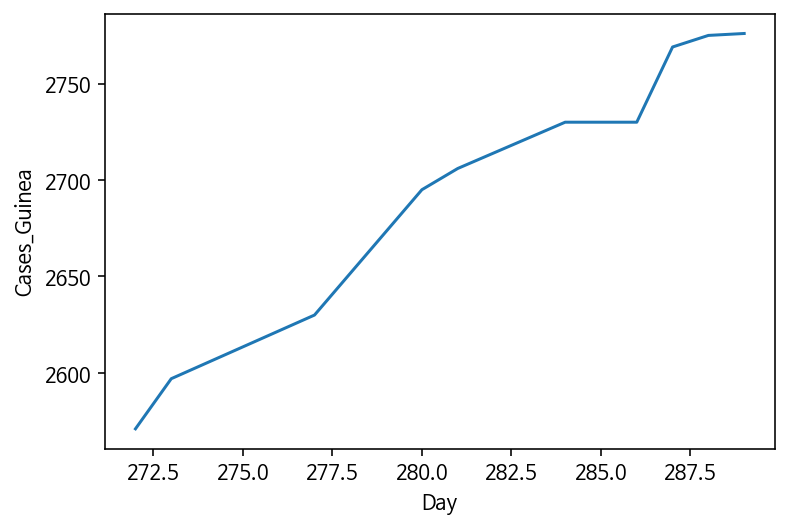

In [133]:
# method {‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None} 출처
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
sns.lineplot(data = subset_ebola.fillna(method = 'bfill'), x = 'Day', y = 'Cases_Guinea')

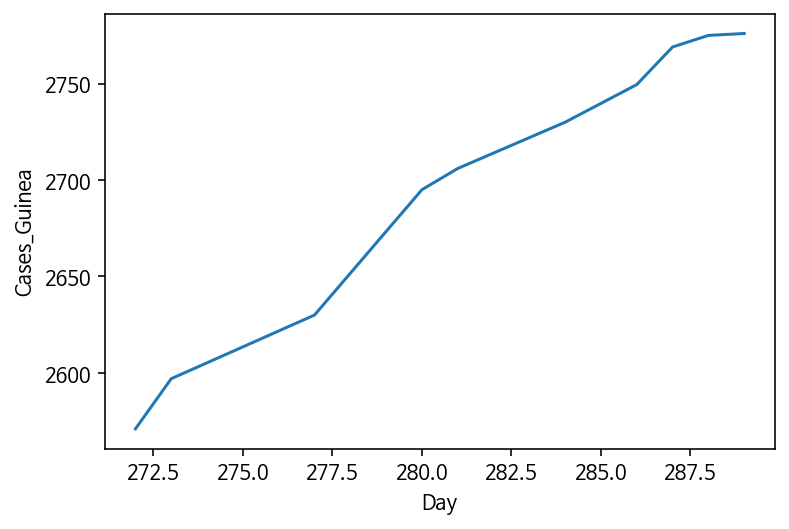

In [138]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html
sns.lineplot(data = subset_ebola.interpolate(), x = 'Day', y = 'Cases_Guinea')

### 누락값 삭제하기

In [140]:
ebola.dropna()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
19,11/18/2014,241,2047.0,7082.0,6190.0,20.0,1.0,4.0,1.0,6.0,1214.0,2963.0,1267.0,8.0,0.0,1.0,0.0,6.0


In [143]:
ebola.dropna(subset = ['Cases_Liberia'])

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
5,12/28/2014,281,2706.0,8018.0,9446.0,NaN,NaN,NaN,NaN,NaN,1708.0,3423.0,2758.0,NaN,NaN,NaN,NaN,NaN
7,12/24/2014,277,2630.0,7977.0,9203.0,NaN,NaN,NaN,NaN,NaN,NaN,3413.0,2655.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,4/1/2014,10,127.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,83.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN
114,3/31/2014,9,122.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,80.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN
115,3/29/2014,7,112.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
116,3/28/2014,6,112.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,70.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN


### 누락값을 삭제하지 않으면?

In [147]:
ebola['Cases_multiple'] = ebola['Cases_Guinea'] + ebola['Cases_Liberia'] + ebola['Cases_SierraLeone']
ebola[['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone', 'Cases_multiple']]

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_multiple
0,2776.0,NaN,10030.0,NaN
1,2775.0,NaN,9780.0,NaN
2,2769.0,8166.0,9722.0,20657.0
3,NaN,8157.0,NaN,NaN
4,2730.0,8115.0,9633.0,20478.0
...,...,...,...,...
117,103.0,8.0,6.0,117.0
118,86.0,NaN,NaN,NaN
119,86.0,NaN,NaN,NaN
120,86.0,NaN,NaN,NaN


In [148]:
ebola['Cases_Guinea'] = ebola['Cases_Guinea'].fillna(method = 'ffill')

0      2776.0
1      2775.0
2      2769.0
3      2769.0
4      2730.0
        ...  
117     103.0
118      86.0
119      86.0
120      86.0
121      49.0
Name: Cases_Guinea, Length: 122, dtype: float64

# 실전 데이터 분석

## 쇼핑몰 데이터 분석

In [151]:
import os
os.listdir('쇼핑몰데이터')

['transaction_detail_2.csv',
 'item_master.csv',
 'transaction_2.csv',
 'transaction_detail_1.csv',
 'transaction_1.csv',
 'customer_master.csv']

In [152]:
import pandas as pd
customer_master = pd.read_csv('쇼핑몰데이터/customer_master.csv')
item_master = pd.read_csv('쇼핑몰데이터/item_master.csv')
transaction_1 = pd.read_csv('쇼핑몰데이터/transaction_1.csv')
transaction_2 = pd.read_csv('쇼핑몰데이터/transaction_2.csv')
transaction_detail_1 = pd.read_csv('쇼핑몰데이터/transaction_detail_1.csv')
transaction_detail_2 = pd.read_csv('쇼핑몰데이터/transaction_detail_2.csv')

In [159]:
transaction = pd.concat([transaction_1,transaction_2], ignore_index = True)
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


In [162]:
transaction_detail = pd.concat([transaction_detail_1,transaction_detail_2], ignore_index = True)

In [168]:
transaction

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
6781,T0000006894,180000,2019-07-31 21:20:44,HI400734
6782,T0000006895,85000,2019-07-31 21:52:48,AS339451
6783,T0000006896,100000,2019-07-31 23:35:25,OA027325
6784,T0000006897,85000,2019-07-31 23:39:35,TS624738


In [191]:
join_data = transaction_detail.merge(transaction.drop(['price'], axis = 1), on = 'transaction_id', how = 'left')


In [198]:
# join_data, item_master, customer_master 를 결합해주세요!
merge1 = join_data.merge(item_master, on = 'item_id', how = 'left')
merge2 = merge1.merge(customer_master, on = 'customer_id', how = 'left')
merge2.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price,customer_name,registration_date,email,gender,age,birth,pref
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,PC-C,120000,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,PC-E,210000,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,PC-B,85000,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시


In [203]:
merge2['price'] = merge2['quantity'] * merge2['item_price']

In [205]:
print(merge2['price'].sum())
print(transaction['price'].sum())

971135000
971135000


In [208]:
merge2.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
item_name            0
item_price           0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
price                0
dtype: int64

In [210]:
merge2.describe()

,detail_id,quantity,item_price,age,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,121698.628219,50.265677,135937.150056
std,2062.439494,0.513647,64571.311830,17.190314,68511.453297
min,0.000000,1.000000,50000.000000,20.000000,50000.000000
25%,1785.750000,1.000000,50000.000000,36.000000,85000.000000
50%,3571.500000,1.000000,102500.000000,50.000000,120000.000000
75%,5357.250000,1.000000,187500.000000,65.000000,210000.000000
max,7143.000000,4.000000,210000.000000,80.000000,420000.000000


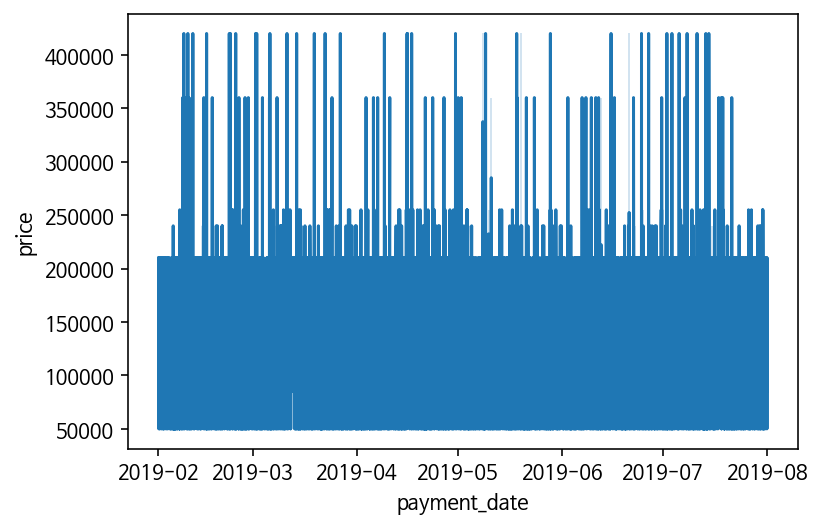

In [213]:
import seaborn as sns
sns.lineplot(data = merge2, x = 'payment_date', y = 'price')

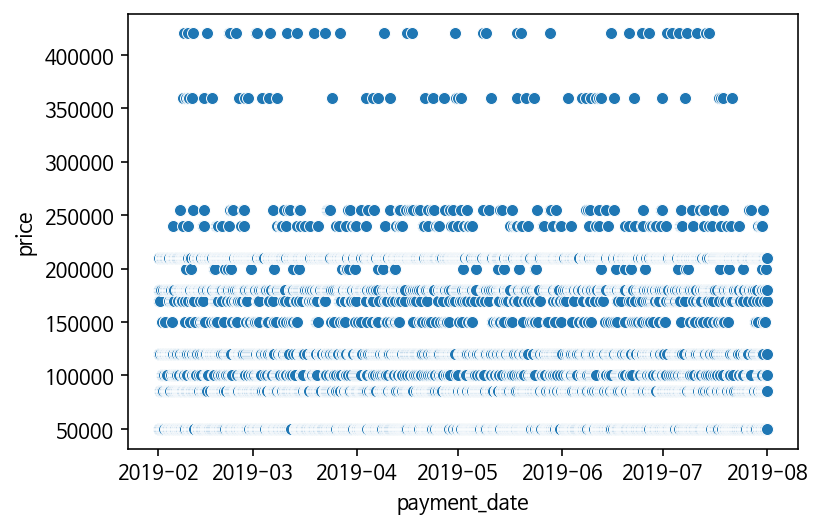

In [215]:
sns.scatterplot(data = merge2, x = 'payment_date', y = 'price')

In [217]:
merge2['payment_date'] = pd.to_datetime(merge2['payment_date'])
merge2['day'] = merge2['payment_date'].dt.strftime('%Y-%m-%d')

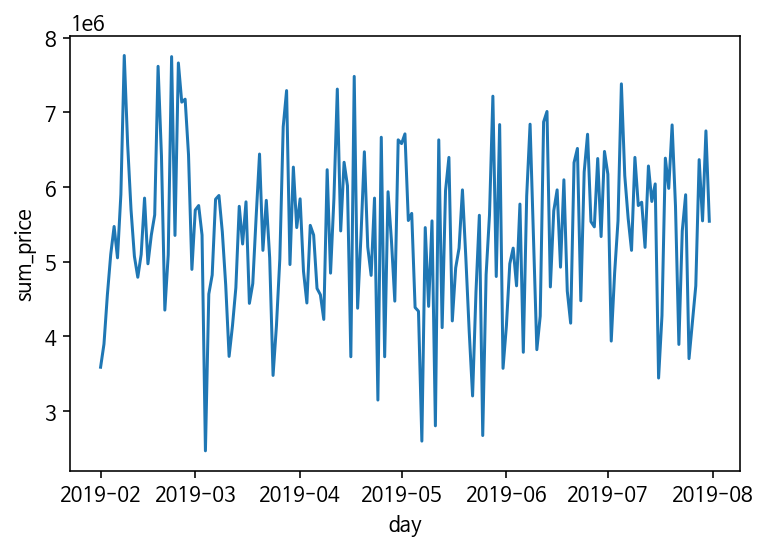

In [224]:
day_sum_price = merge2.groupby('day', as_index = False).agg(sum_price = ('price', 'sum'))
day_sum_price['day'] = pd.to_datetime(day_sum_price['day'])
sns.lineplot(data = day_sum_price, x = 'day', y = 'sum_price')

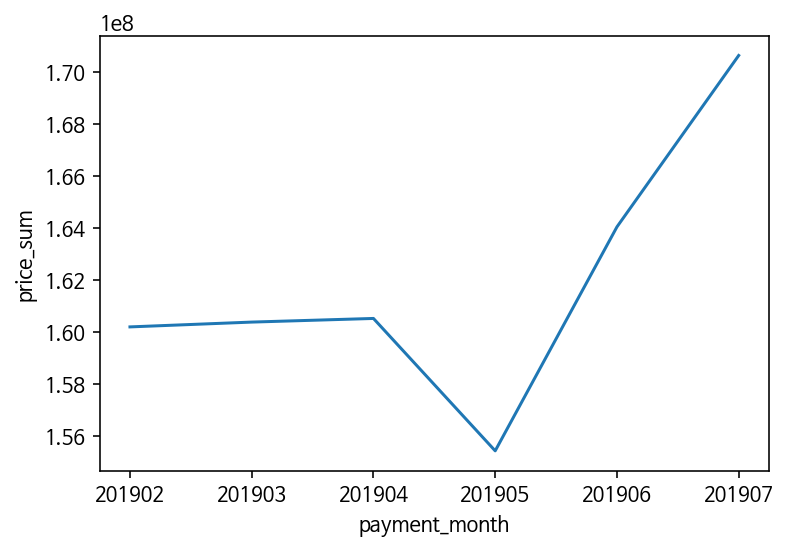

In [232]:
# (1) payment_date를 활용하여 payment_month(%Y%m) 칼럼을 생성하라
merge2['payment_month'] = merge2['payment_date'].dt.strftime('%Y%m')
# (2) (1)에서 생성한 payment_month를 활용하여 월별 매출의 총합을 계산하라.
price_month = merge2.groupby('payment_month', as_index = False).agg(price_sum = ('price', 'sum'))
# (3) payment_month를 datetime 자료형으로 수정하고 (2)에서 생성한 DataFrame을 활용하여 lineplot을 그려라.
merge2['payment_month'] = pd.to_datetime(merge2['payment_month'], format = '%Y%m')
sns.lineplot(data = price_month, x = 'payment_month', y = 'price_sum')

In [234]:
# (1) 성별에 따른 매출 총합을 비교하고 어떤 성별이 매출이 더 높은지 구해보세요.
merge2.groupby('gender').agg(sum_price = ('price','sum'))

,sum_price
gender,
F,481045000
M,490090000


In [238]:
# (2) 태어난 년도(birth) 별 매출을 구해보세요.
merge2['birth'] = pd.to_datetime(merge2['birth'])
merge2['birth_year'] = merge2['birth'].dt.year
merge2.groupby('birth_year').agg(sum_price = ('price','sum'))

,sum_price
birth_year,
1938,4405000
1939,15300000
1940,10225000
1941,12270000
1942,14515000
...,...
1995,13750000
1996,16085000
1997,11935000


In [244]:
# 구입월에 따른 상품별 매출
graph_data = merge2.groupby(['payment_month','item_name'], as_index = False).agg(sum_price = ('price', 'sum'),
                                                  sum_quantity = ('quantity', 'sum'))

In [241]:
pd.pivot_table(merge2, index = 'item_name', columns = 'payment_month', values = ['price', 'quantity'], aggfunc = 'sum')

price                                              \
payment_month 2019-02-01 2019-03-01 2019-04-01 2019-05-01 2019-06-01   
item_name                                                              
PC-A            24150000   26000000   25900000   24850000   26000000   
PC-B            25245000   25500000   23460000   25330000   23970000   
PC-C            19800000   19080000   21960000   20520000   21840000   
PC-D            31140000   25740000   24300000   25920000   28800000   
PC-E            59850000   64050000   64890000   58800000   63420000   

                           quantity                                   \
payment_month 2019-07-01 2019-02-01 2019-03-01 2019-04-01 2019-05-01   
item_name                                                              
PC-A            25250000        483        520        518        497   
PC-B            28220000        297        300        276        298   
PC-C            19440000        165        159        183        171   
PC-D            26100000        173        143        135        144   
PC-E            71610000        285        305        309        280   

                                     
payment_month 2019-06-01 2019-07-01  
item_name                            
PC-A                 520        505  
PC-B                 282        332  
PC-C                 182        162  
PC-D                 160        145  
PC-E                 302        341

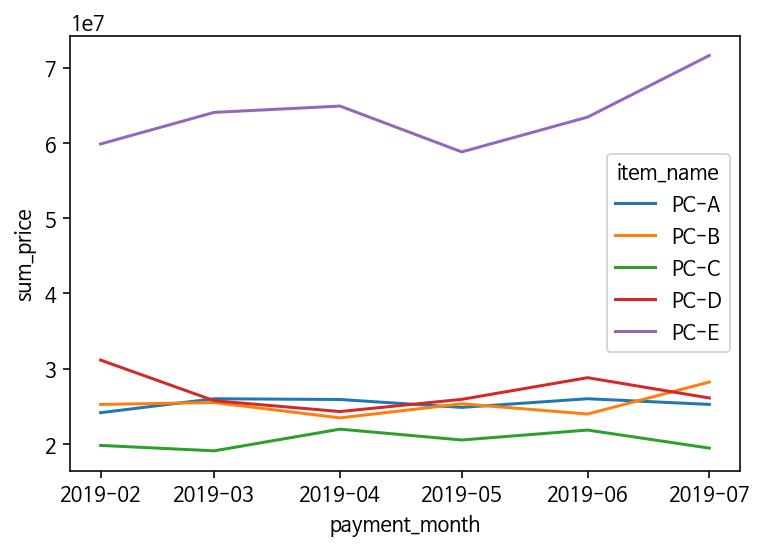

In [250]:
sns.lineplot(data = graph_data, x = 'payment_month', y = 'sum_price', hue = 'item_name')